# 2.1

In [14]:
import pandas as pd
from datetime import datetime
from functools import partial

In [15]:
data = pd.read_csv("week2.csv")#loading week2.csv file
del data['Unnamed: 0']
duplicate_data = data 
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,MINDTREE,EQ,15-May-2017,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change
1,MINDTREE,EQ,16-May-2017,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change
2,MINDTREE,EQ,17-May-2017,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,5,2017,508.495948,-0.009681,Slight or No change
3,MINDTREE,EQ,18-May-2017,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,5,2017,500.779579,-0.026563,Slight or No change
4,MINDTREE,EQ,19-May-2017,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,5,2017,500.222798,0.009333,Slight or No change


In [16]:
data.Date.dtype

dtype('O')

In [17]:
data['Date'] = pd.to_datetime(data['Date'])
data.Date.dtype

dtype('<M8[ns]')

In [18]:
data.set_index('Date', inplace = True)
data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,MINDTREE,EQ,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change
2017-05-16,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change
2017-05-17,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,5,2017,508.495948,-0.009681,Slight or No change
2017-05-18,MINDTREE,EQ,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,5,2017,500.779579,-0.026563,Slight or No change
2017-05-19,MINDTREE,EQ,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,5,2017,500.222798,0.009333,Slight or No change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,MINDTREE,EQ,981.75,982.80,985.00,975.00,981.00,979.95,979.77,1242934,1.217784e+09,10864,884988,71.20,5,2019,856.636578,-0.001833,Slight or No change
2019-05-08,MINDTREE,EQ,979.95,981.00,985.00,971.05,982.00,980.50,979.84,4301316,4.214603e+09,13038,3851210,89.54,5,2019,857.418361,0.000561,Slight or No change
2019-05-09,MINDTREE,EQ,980.50,979.60,983.15,976.10,980.90,980.45,980.02,3787159,3.711482e+09,8159,3479880,91.89,5,2019,858.098293,-0.000051,Slight or No change


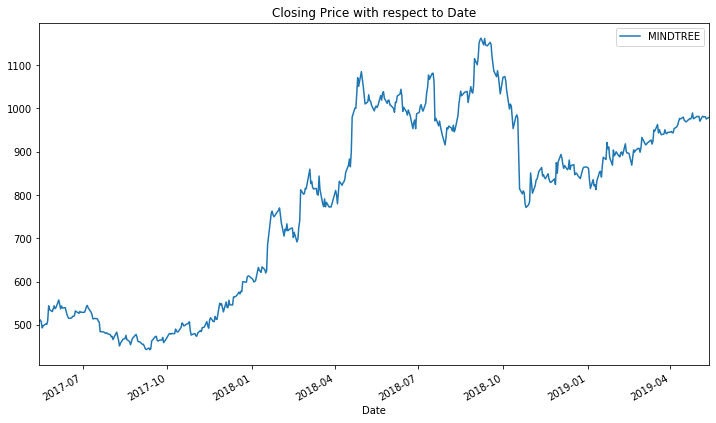

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
data['Close Price'].plot(label = 'MINDTREE',figsize=(12,7),title='Closing Price with respect to Date')
plt.legend()

In [20]:
data['Close Price'].diff().abs().sort_values(ascending = False)

Date
2018-10-19    164.05
2018-07-19     90.65
2018-04-20     82.25
2018-02-23     71.20
2018-10-31     64.70
               ...  
2018-12-20      0.05
2017-07-21      0.05
2019-05-09      0.05
2017-07-03      0.05
2017-05-15       NaN
Name: Close Price, Length: 494, dtype: float64

In [21]:
import bs4
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests 
# more than 1 news is available for a single date so using different related variables
url_2018_10_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1103-cholamandalam-securities-3064341.html'
r = requests.get(url_2018_10_19) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("Printing news for only 4 dates since the 5th date has no news")
print("Obtaining news from Money Control")
print("News for 2018-10-19")
print("Only 1 news is available on this date")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)
print("*****************************************************************")

url_2018_07_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1115-hdfc-securities-2734761.html'
r = requests.get(url_2018_07_19) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_07_19")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)
print("******************************************************************")

url_2018_04_20 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1000-reliance-securities-2553515.html'
r = requests.get(url_2018_04_20) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_04_20")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)
print("********************************************************************")

url_2018_02_23 = 'https://www.moneycontrol.com/news/business/buy-mindtree-pidilite-industries-sell-upl-tata-steel-tata-motors-sudarshan-sukhani-2513371.html'
r = requests.get(url_2018_02_23) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_02_23")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)
print("*********************************************************************")

Printing news for only 4 dates since the 5th date has no news
Obtaining news from Money Control
News for 2018-10-19
Only 1 news is available on this date


Title:
Buy Mindtree; target of Rs 1103: Cholamandalam Securities


Subject:
Cholamandalam Securities is bullish on Mindtree has recommended buy rating on the stock with a target price of Rs 1103 in its research report dated October 19, 2018.


Report:
In 2QFY19, Mindtree’s revenue grew by 7.1% QoQ to INR 17.5bn in line with our expectations of INR 17.6bn largely driven by volume (+6.3% QoQ) and INR depreciation. In USD terms, revenues grew by 2% QoQ. In constant currency terms, revenue grew by 2.4% QoQ. Revenue from Digital business grew by 3.3% QoQ contributing 48.1% to total revenues. EBITDA grew by 16.8% QoQ to INR 2.7bn in-line with our expectations. EBITDA margin expanded by 130bps QoQ to 15.4%. EBITDA margin expanded on account of rupee depreciation (+130 bps) and presence of one off cost in the base quarter (+60bps) which was

In [32]:
data = data.reset_index(level=['Date'])
data

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,2017-05-15,MINDTREE,EQ,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change
1,2017-05-16,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change
2,2017-05-17,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,5,2017,508.495948,-0.009681,Slight or No change
3,2017-05-18,MINDTREE,EQ,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,5,2017,500.779579,-0.026563,Slight or No change
4,2017-05-19,MINDTREE,EQ,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,5,2017,500.222798,0.009333,Slight or No change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2019-05-07,MINDTREE,EQ,981.75,982.80,985.00,975.00,981.00,979.95,979.77,1242934,1.217784e+09,10864,884988,71.20,5,2019,856.636578,-0.001833,Slight or No change
490,2019-05-08,MINDTREE,EQ,979.95,981.00,985.00,971.05,982.00,980.50,979.84,4301316,4.214603e+09,13038,3851210,89.54,5,2019,857.418361,0.000561,Slight or No change
491,2019-05-09,MINDTREE,EQ,980.50,979.60,983.15,976.10,980.90,980.45,980.02,3787159,3.711482e+09,8159,3479880,91.89,5,2019,858.098293,-0.000051,Slight or No change
492,2019-05-10,MINDTREE,EQ,980.45,980.40,982.90,973.00,974.00,975.35,977.55,215170,2.103396e+08,5128,26734,12.42,5,2019,858.135098,-0.005202,Slight or No change


# 2.2

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

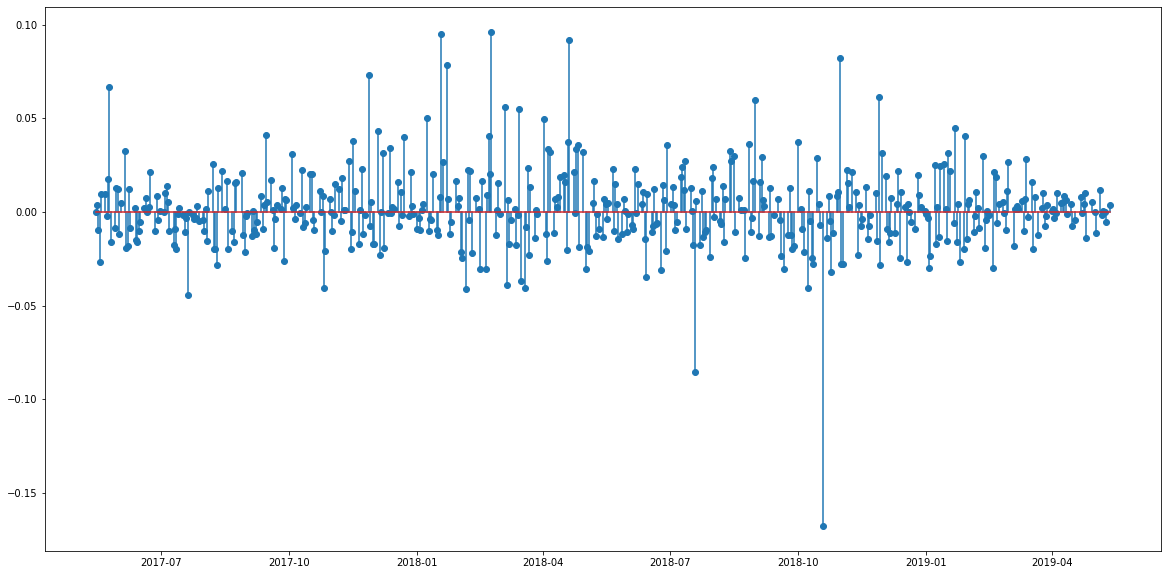

In [33]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Day_Perc_Change'])

# 2.3

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

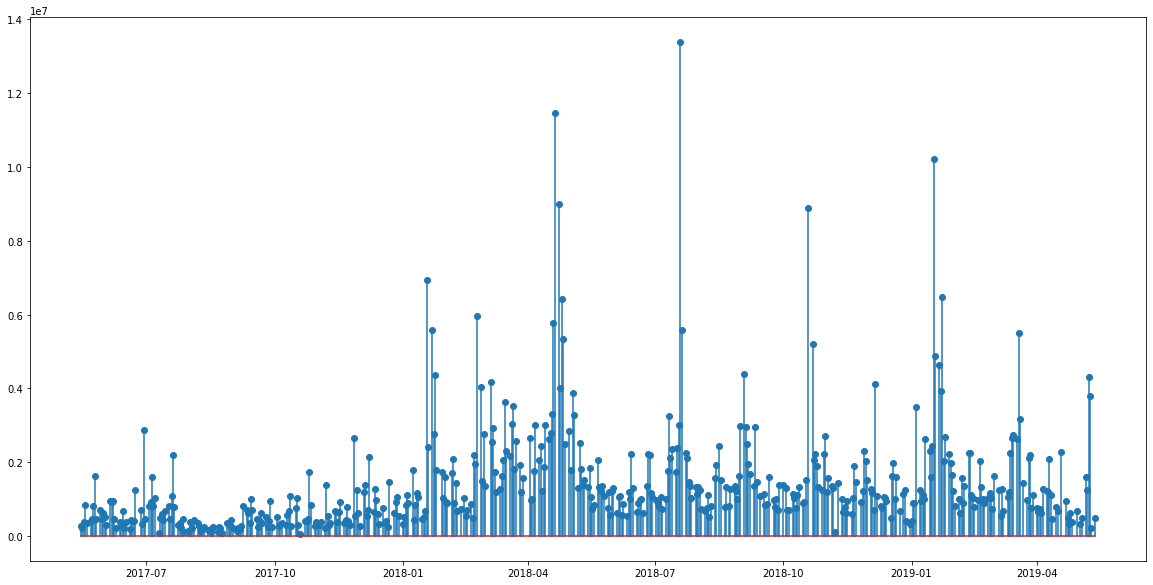

In [34]:
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Total Traded Quantity'])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


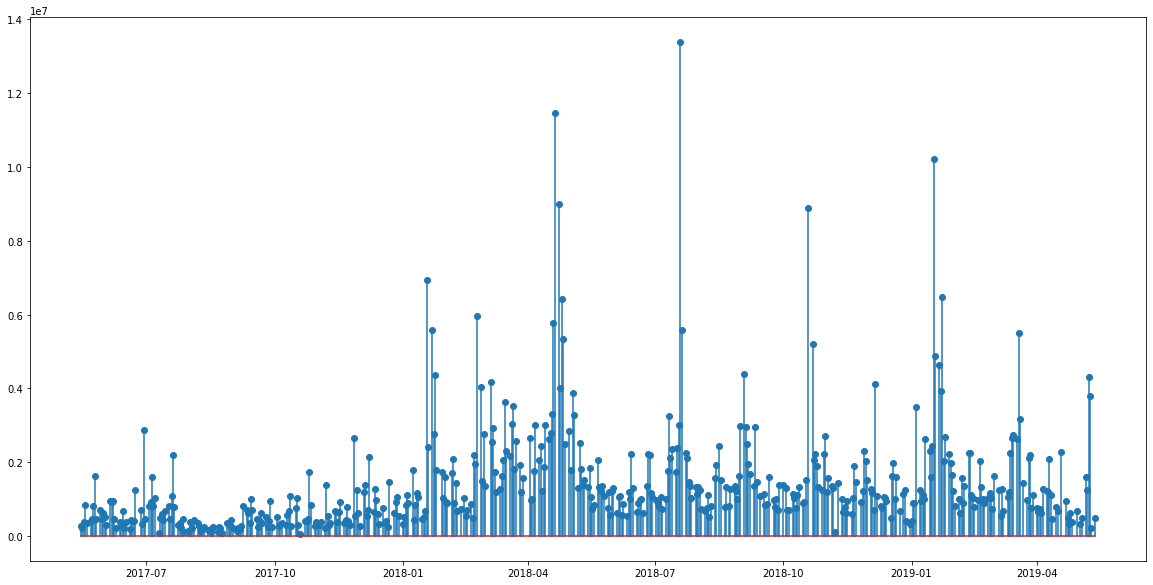

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


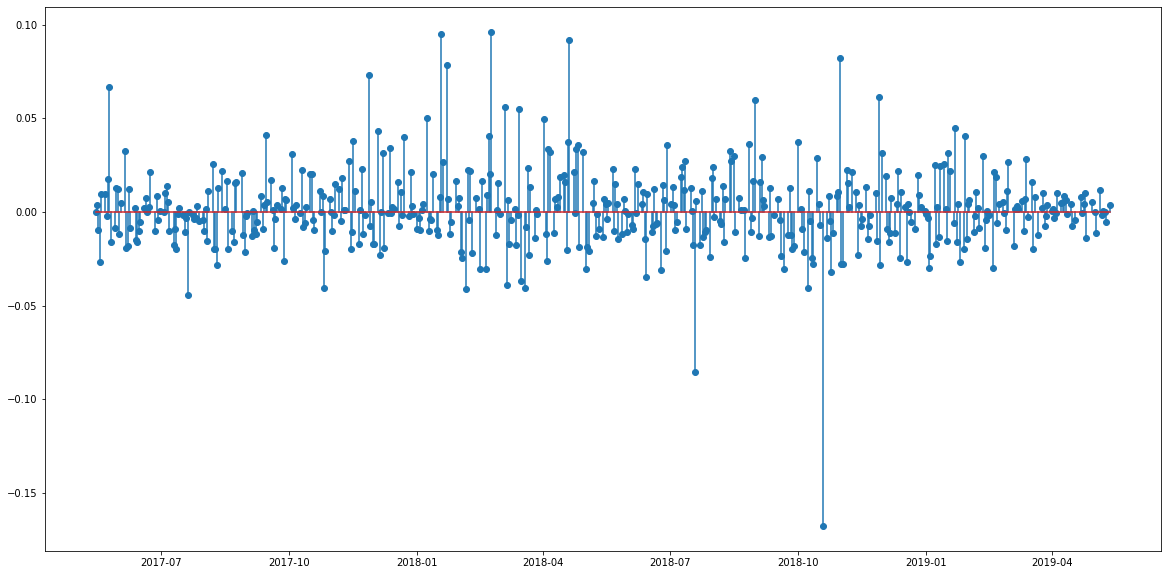

In [35]:
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Day_Perc_Change'])
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


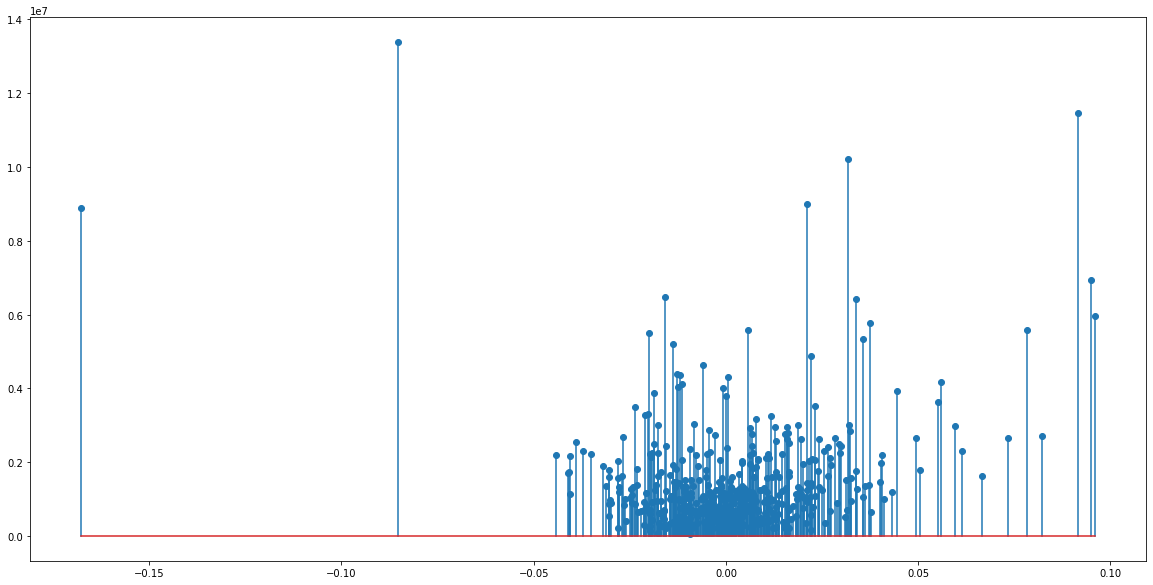

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


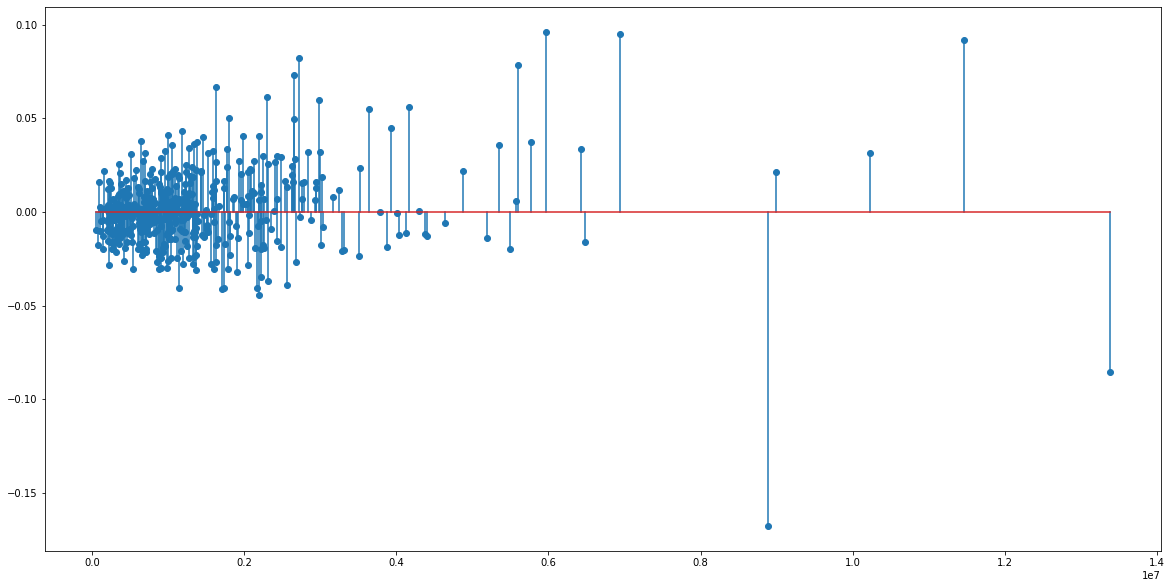

In [36]:
plt.figure(figsize=(20,10))
plt.stem(data['Day_Perc_Change'],data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.stem(data['Total Traded Quantity'],data['Day_Perc_Change'])
plt.show()

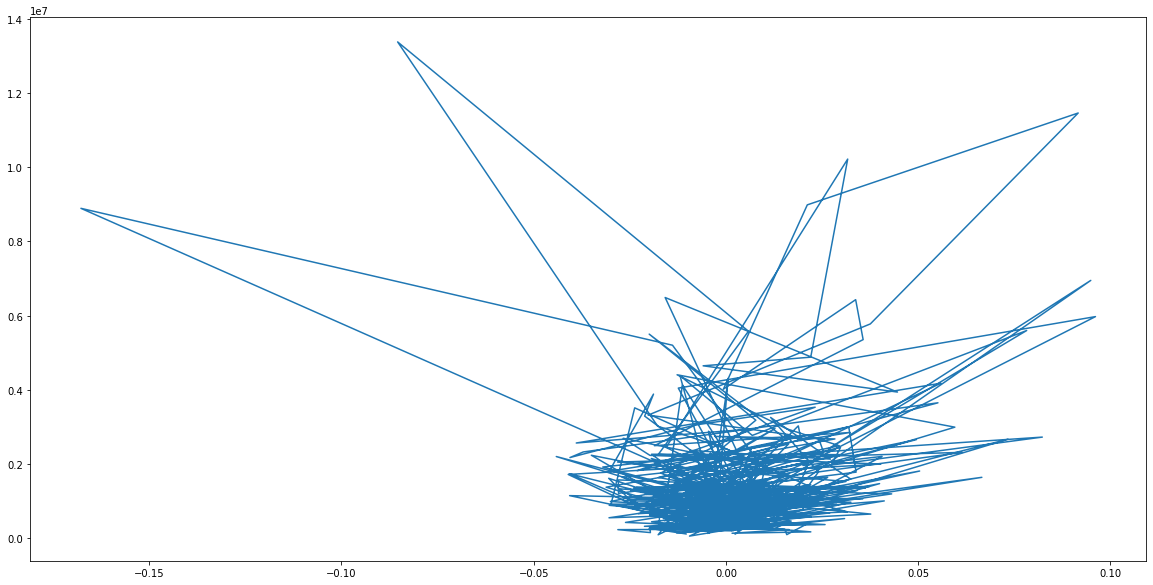

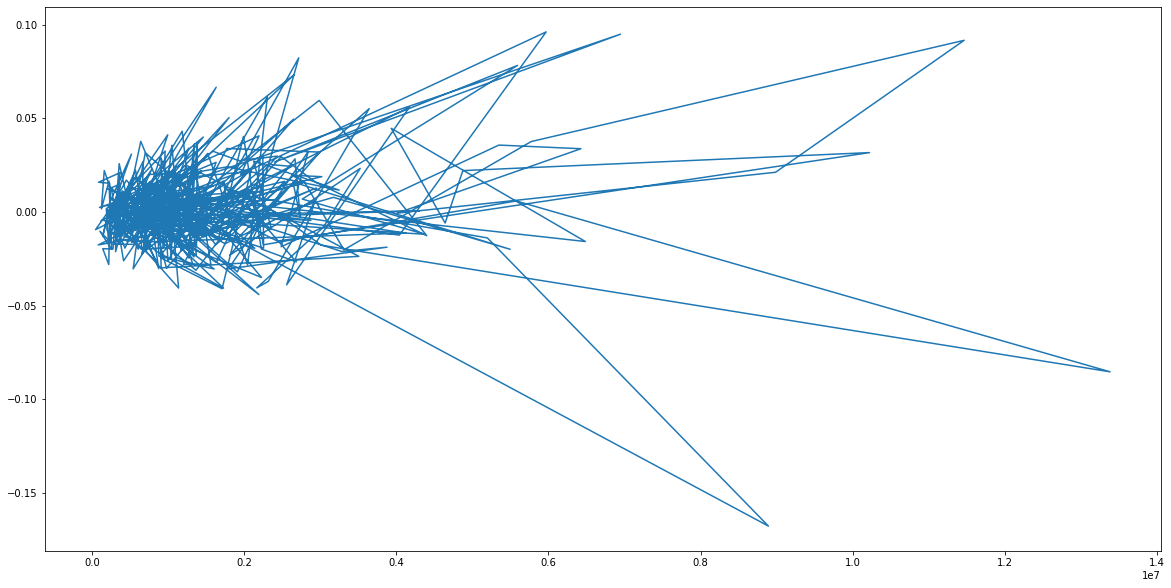

In [38]:
plt.figure(figsize=(20,10))
plt.plot(data['Day_Perc_Change'],data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.plot(data['Total Traded Quantity'],data['Day_Perc_Change'])
plt.show()

# 2.4

In [39]:
import matplotlib.pyplot as plt
from collections import Counter

Trendsare = ['Postive','Negative','Breakout Bull','Breakout Bear','Among top losers','Among top gainers','Slight or No Change','Slight Positive','Slight Negative']
Trend_to_list = data['Trend'].tolist()
counts = Counter(Trend_to_list)
counts

Counter({'Slight or No change': 494})

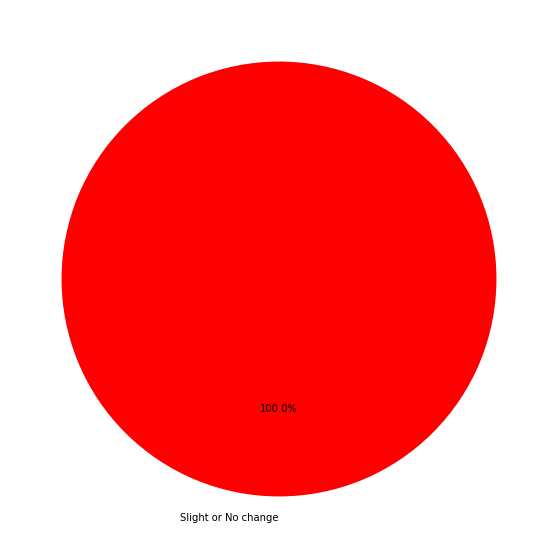

In [40]:
counter = [494]
labels= ['Slight or No change']
colors = ['r']
plt.figure(figsize=(20,10))
plt.pie(counter, labels=labels,colors=colors,startangle=90, autopct='%.1f%%')
plt.show()

In [41]:
import matplotlib.pyplot as plt

gk = data.groupby(['Trend'])['Total Traded Quantity']
gk.describe()

,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Slight or No change,494.0,1.388615e+06,1.450169e+06,46300.0,572476.25,1006586.5,1631997.25,13385207.0


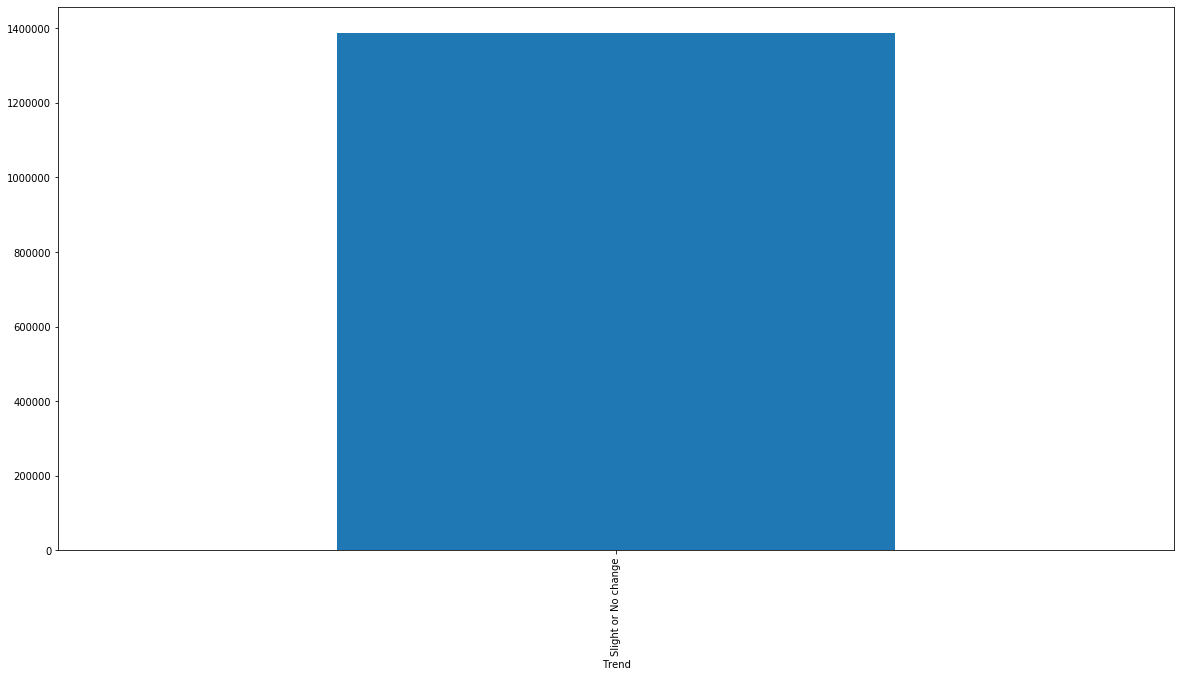

In [42]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].mean().plot.bar()

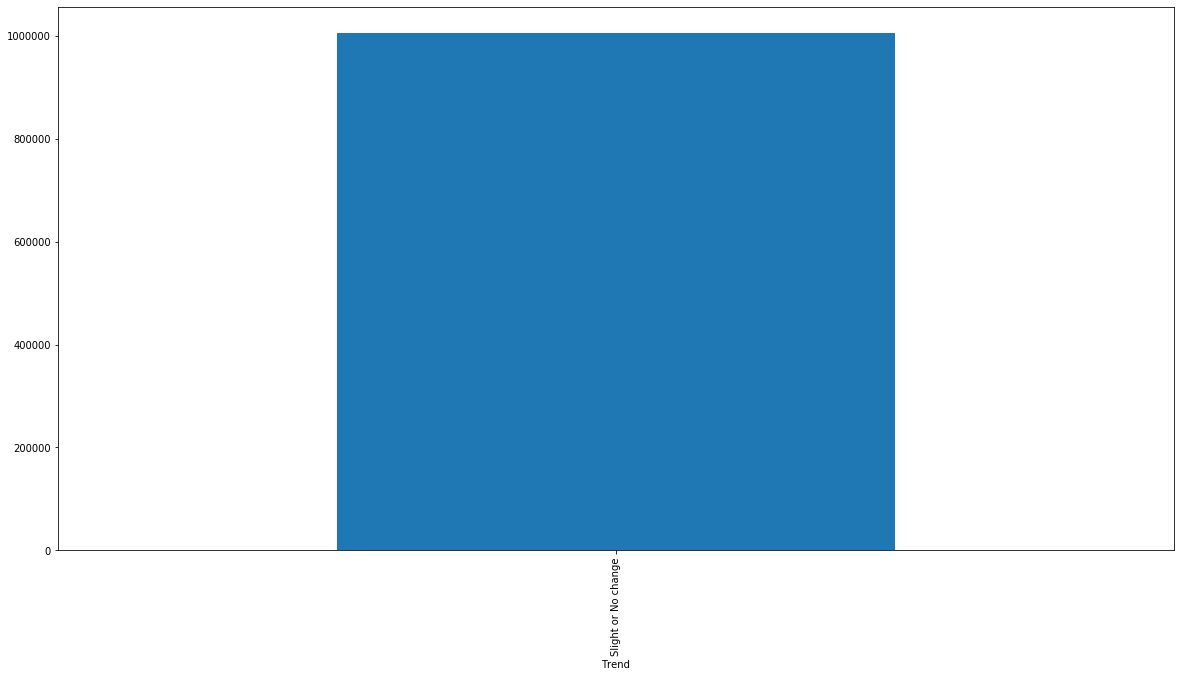

In [43]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].median().plot.bar()

# 2.5

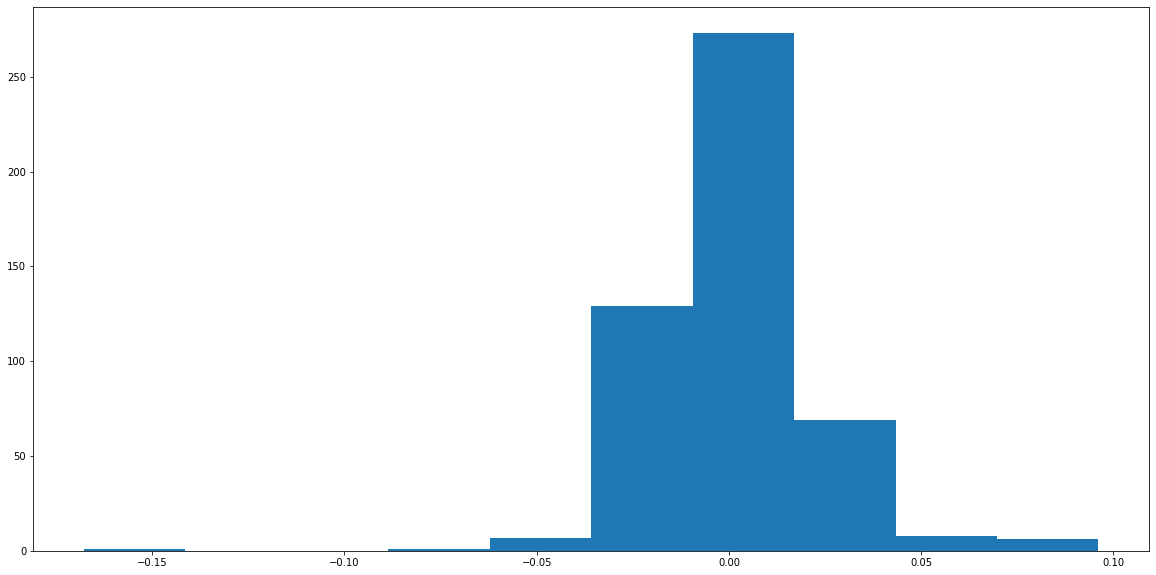

In [44]:
plt.figure(figsize=(20,10))
plt.hist(data['Day_Perc_Change'])
plt.show()

# 2.6

In [46]:
import pandas as pd
wipro_data = pd.read_csv('wipro_stock_data.csv')
tcs_data = pd.read_csv('tcs_stock_data.csv')
itc_data = pd.read_csv('itc_stock_data.csv')
cub_data = pd.read_csv('cub_stock_data.csv')
airtel_data = pd.read_csv('airtel_stock_data.csv')

In [47]:
wipro_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,06-Jul-2017,257.80,257.80,260.05,255.85,256.50,257.75,258.02,1649570,4.256266e+08,16693,965007,58.50
1,WIPRO,EQ,07-Jul-2017,257.75,255.10,258.25,255.00,257.10,257.70,257.36,1458678,3.754085e+08,19295,957019,65.61
2,WIPRO,EQ,10-Jul-2017,257.70,260.00,268.95,257.00,268.50,268.25,266.40,667432,1.778045e+08,6517,408579,61.22
3,WIPRO,EQ,11-Jul-2017,268.25,266.20,273.50,262.10,264.00,263.20,267.63,4060405,1.086678e+09,53473,2387366,58.80
4,WIPRO,EQ,12-Jul-2017,263.20,263.70,265.80,261.30,263.40,263.80,263.40,1189091,3.132094e+08,38856,647523,54.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,WIPRO,EQ,01-Jul-2019,280.50,281.60,283.40,280.95,282.15,282.00,282.14,1735921,4.897758e+08,33665,955355,55.03
491,WIPRO,EQ,02-Jul-2019,282.00,282.45,285.00,281.70,284.30,284.25,283.86,2609369,7.407040e+08,38881,1219656,46.74
492,WIPRO,EQ,03-Jul-2019,284.25,284.90,285.60,282.05,282.65,282.85,283.25,1258276,3.564106e+08,21561,505062,40.14
493,WIPRO,EQ,04-Jul-2019,282.85,283.00,284.90,282.00,283.60,283.85,283.77,1628331,4.620724e+08,24896,961449,59.05


In [48]:
tcs_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,06-Jul-2017,2356.00,2359.0,2361.90,2340.10,2350.05,2347.55,2348.75,513394,1.205835e+09,26826,342973,66.81
1,TCS,EQ,07-Jul-2017,2347.55,2350.0,2356.45,2325.50,2332.00,2331.95,2343.49,616045,1.443698e+09,52731,417958,67.85
2,TCS,EQ,10-Jul-2017,2331.95,2341.0,2444.90,2341.00,2435.00,2434.95,2426.54,398392,9.667144e+08,12486,188289,47.26
3,TCS,EQ,11-Jul-2017,2434.95,2426.0,2514.80,2426.00,2482.50,2475.80,2478.13,1768752,4.383195e+09,96054,937311,52.99
4,TCS,EQ,12-Jul-2017,2475.80,2482.5,2483.30,2430.10,2441.00,2439.45,2453.34,1323225,3.246316e+09,62259,926229,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,TCS,EQ,01-Jul-2019,2227.20,2235.0,2255.00,2206.60,2233.05,2239.55,2237.15,2769940,6.196759e+09,129268,1579799,57.03
491,TCS,EQ,02-Jul-2019,2239.55,2244.9,2257.00,2216.45,2254.30,2252.10,2237.79,1771746,3.964797e+09,97184,816451,46.08
492,TCS,EQ,03-Jul-2019,2252.10,2252.2,2258.80,2232.00,2234.00,2237.65,2242.16,1656881,3.714997e+09,87941,739089,44.61
493,TCS,EQ,04-Jul-2019,2237.65,2234.0,2252.00,2230.10,2241.00,2242.65,2241.04,984140,2.205502e+09,59990,352899,35.86


In [49]:
itc_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,06-Jul-2017,331.05,334.30,338.75,331.30,337.10,337.10,336.17,13429462,4.514575e+09,122886,8156576,60.74
1,ITC,EQ,07-Jul-2017,337.10,338.00,338.20,333.05,334.50,334.30,334.92,9919790,3.322371e+09,91378,6752966,68.08
2,ITC,EQ,10-Jul-2017,334.30,341.00,367.70,331.00,333.00,333.30,333.45,1427399,4.759600e+08,11885,679722,47.62
3,ITC,EQ,11-Jul-2017,333.30,335.00,335.05,330.00,330.20,330.40,331.28,8336685,2.761738e+09,85756,6032829,72.36
4,ITC,EQ,12-Jul-2017,330.40,328.40,333.60,327.40,329.80,328.85,329.19,10249263,3.373964e+09,90432,7048111,68.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,ITC,EQ,01-Jul-2019,273.85,274.40,276.25,274.15,275.20,274.95,275.18,5042447,1.387580e+09,59587,2733563,54.21
491,ITC,EQ,02-Jul-2019,274.95,275.35,275.65,273.20,273.55,273.85,273.97,9976439,2.733288e+09,91998,7785650,78.04
492,ITC,EQ,03-Jul-2019,273.85,274.30,277.55,272.15,277.20,276.70,273.97,18120809,4.964575e+09,96803,13196093,72.82
493,ITC,EQ,04-Jul-2019,276.70,277.45,278.25,275.20,277.80,277.65,276.63,9697597,2.682609e+09,98989,6642736,68.50


In [50]:
cub_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CUB,EQ,06-Jul-2017,179.60,179.25,181.00,178.80,180.10,180.00,180.04,513327,9.241908e+07,4265,457813,89.19
1,CUB,EQ,07-Jul-2017,180.00,182.00,182.75,179.40,182.20,181.55,181.40,150843,2.736324e+07,2074,88526,58.69
2,CUB,EQ,10-Jul-2017,181.55,180.00,185.35,180.00,184.80,184.80,184.11,90882,1.673227e+07,776,68791,75.69
3,CUB,EQ,11-Jul-2017,184.80,186.90,187.60,182.10,183.00,183.50,182.90,1138652,2.082593e+08,5030,987514,86.73
4,CUB,EQ,12-Jul-2017,183.50,184.40,184.75,182.30,182.50,183.05,183.39,313207,5.743804e+07,3905,244864,78.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,CUB,EQ,01-Jul-2019,218.05,218.50,219.15,214.70,217.90,218.10,217.07,210062,4.559752e+07,3858,103153,49.11
491,CUB,EQ,02-Jul-2019,218.10,217.95,218.00,215.10,215.80,215.80,216.57,184540,3.996587e+07,8593,107555,58.28
492,CUB,EQ,03-Jul-2019,215.80,217.95,218.00,212.65,212.85,213.45,215.78,954745,2.060188e+08,5585,884516,92.64
493,CUB,EQ,04-Jul-2019,213.45,212.95,213.75,210.20,210.25,210.75,212.14,1026703,2.178076e+08,4284,911802,88.81


In [51]:
airtel_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BHARTIARTL,EQ,06-Jul-2017,376.30,376.55,382.85,373.95,381.20,381.30,379.89,2162556,8.215367e+08,28573,1129739,52.24
1,BHARTIARTL,EQ,07-Jul-2017,381.30,384.00,387.55,383.00,387.55,385.90,385.28,4371065,1.684069e+09,37883,3261760,74.62
2,BHARTIARTL,EQ,10-Jul-2017,385.90,388.10,410.15,388.00,405.00,405.70,404.08,1901518,7.683562e+08,14555,881739,46.37
3,BHARTIARTL,EQ,11-Jul-2017,405.70,404.15,408.90,393.45,394.45,395.45,401.71,5565524,2.235742e+09,68716,3113596,55.94
4,BHARTIARTL,EQ,12-Jul-2017,395.45,397.80,402.30,394.45,399.00,397.10,397.28,2608465,1.036278e+09,39662,1147573,43.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,BHARTIARTL,EQ,01-Jul-2019,346.65,347.00,349.85,345.15,348.45,348.50,347.66,3405198,1.183867e+09,74444,1664891,48.89
494,BHARTIARTL,EQ,02-Jul-2019,348.50,349.00,354.50,347.35,352.70,353.60,351.74,3745884,1.317578e+09,50799,1460631,38.99
495,BHARTIARTL,EQ,03-Jul-2019,353.60,352.90,356.50,349.75,352.90,353.20,354.15,8317090,2.945468e+09,50960,5653437,67.97
496,BHARTIARTL,EQ,04-Jul-2019,353.20,353.35,365.00,353.00,362.10,362.75,361.71,8407402,3.041005e+09,86438,3971490,47.24


In [52]:
filter_wipro = wipro_data[wipro_data.Series == 'EQ']
filter_wipro

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,06-Jul-2017,257.80,257.80,260.05,255.85,256.50,257.75,258.02,1649570,4.256266e+08,16693,965007,58.50
1,WIPRO,EQ,07-Jul-2017,257.75,255.10,258.25,255.00,257.10,257.70,257.36,1458678,3.754085e+08,19295,957019,65.61
2,WIPRO,EQ,10-Jul-2017,257.70,260.00,268.95,257.00,268.50,268.25,266.40,667432,1.778045e+08,6517,408579,61.22
3,WIPRO,EQ,11-Jul-2017,268.25,266.20,273.50,262.10,264.00,263.20,267.63,4060405,1.086678e+09,53473,2387366,58.80
4,WIPRO,EQ,12-Jul-2017,263.20,263.70,265.80,261.30,263.40,263.80,263.40,1189091,3.132094e+08,38856,647523,54.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,WIPRO,EQ,01-Jul-2019,280.50,281.60,283.40,280.95,282.15,282.00,282.14,1735921,4.897758e+08,33665,955355,55.03
491,WIPRO,EQ,02-Jul-2019,282.00,282.45,285.00,281.70,284.30,284.25,283.86,2609369,7.407040e+08,38881,1219656,46.74
492,WIPRO,EQ,03-Jul-2019,284.25,284.90,285.60,282.05,282.65,282.85,283.25,1258276,3.564106e+08,21561,505062,40.14
493,WIPRO,EQ,04-Jul-2019,282.85,283.00,284.90,282.00,283.60,283.85,283.77,1628331,4.620724e+08,24896,961449,59.05


In [53]:
filter_tcs = tcs_data[tcs_data.Series == 'EQ']
filter_tcs

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,06-Jul-2017,2356.00,2359.0,2361.90,2340.10,2350.05,2347.55,2348.75,513394,1.205835e+09,26826,342973,66.81
1,TCS,EQ,07-Jul-2017,2347.55,2350.0,2356.45,2325.50,2332.00,2331.95,2343.49,616045,1.443698e+09,52731,417958,67.85
2,TCS,EQ,10-Jul-2017,2331.95,2341.0,2444.90,2341.00,2435.00,2434.95,2426.54,398392,9.667144e+08,12486,188289,47.26
3,TCS,EQ,11-Jul-2017,2434.95,2426.0,2514.80,2426.00,2482.50,2475.80,2478.13,1768752,4.383195e+09,96054,937311,52.99
4,TCS,EQ,12-Jul-2017,2475.80,2482.5,2483.30,2430.10,2441.00,2439.45,2453.34,1323225,3.246316e+09,62259,926229,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,TCS,EQ,01-Jul-2019,2227.20,2235.0,2255.00,2206.60,2233.05,2239.55,2237.15,2769940,6.196759e+09,129268,1579799,57.03
491,TCS,EQ,02-Jul-2019,2239.55,2244.9,2257.00,2216.45,2254.30,2252.10,2237.79,1771746,3.964797e+09,97184,816451,46.08
492,TCS,EQ,03-Jul-2019,2252.10,2252.2,2258.80,2232.00,2234.00,2237.65,2242.16,1656881,3.714997e+09,87941,739089,44.61
493,TCS,EQ,04-Jul-2019,2237.65,2234.0,2252.00,2230.10,2241.00,2242.65,2241.04,984140,2.205502e+09,59990,352899,35.86


In [54]:
filter_itc = itc_data[itc_data.Series == 'EQ']
filter_itc

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,06-Jul-2017,331.05,334.30,338.75,331.30,337.10,337.10,336.17,13429462,4.514575e+09,122886,8156576,60.74
1,ITC,EQ,07-Jul-2017,337.10,338.00,338.20,333.05,334.50,334.30,334.92,9919790,3.322371e+09,91378,6752966,68.08
2,ITC,EQ,10-Jul-2017,334.30,341.00,367.70,331.00,333.00,333.30,333.45,1427399,4.759600e+08,11885,679722,47.62
3,ITC,EQ,11-Jul-2017,333.30,335.00,335.05,330.00,330.20,330.40,331.28,8336685,2.761738e+09,85756,6032829,72.36
4,ITC,EQ,12-Jul-2017,330.40,328.40,333.60,327.40,329.80,328.85,329.19,10249263,3.373964e+09,90432,7048111,68.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,ITC,EQ,01-Jul-2019,273.85,274.40,276.25,274.15,275.20,274.95,275.18,5042447,1.387580e+09,59587,2733563,54.21
491,ITC,EQ,02-Jul-2019,274.95,275.35,275.65,273.20,273.55,273.85,273.97,9976439,2.733288e+09,91998,7785650,78.04
492,ITC,EQ,03-Jul-2019,273.85,274.30,277.55,272.15,277.20,276.70,273.97,18120809,4.964575e+09,96803,13196093,72.82
493,ITC,EQ,04-Jul-2019,276.70,277.45,278.25,275.20,277.80,277.65,276.63,9697597,2.682609e+09,98989,6642736,68.50


In [55]:
filter_cub = cub_data[cub_data.Series == 'EQ']
filter_cub

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CUB,EQ,06-Jul-2017,179.60,179.25,181.00,178.80,180.10,180.00,180.04,513327,9.241908e+07,4265,457813,89.19
1,CUB,EQ,07-Jul-2017,180.00,182.00,182.75,179.40,182.20,181.55,181.40,150843,2.736324e+07,2074,88526,58.69
2,CUB,EQ,10-Jul-2017,181.55,180.00,185.35,180.00,184.80,184.80,184.11,90882,1.673227e+07,776,68791,75.69
3,CUB,EQ,11-Jul-2017,184.80,186.90,187.60,182.10,183.00,183.50,182.90,1138652,2.082593e+08,5030,987514,86.73
4,CUB,EQ,12-Jul-2017,183.50,184.40,184.75,182.30,182.50,183.05,183.39,313207,5.743804e+07,3905,244864,78.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,CUB,EQ,01-Jul-2019,218.05,218.50,219.15,214.70,217.90,218.10,217.07,210062,4.559752e+07,3858,103153,49.11
491,CUB,EQ,02-Jul-2019,218.10,217.95,218.00,215.10,215.80,215.80,216.57,184540,3.996587e+07,8593,107555,58.28
492,CUB,EQ,03-Jul-2019,215.80,217.95,218.00,212.65,212.85,213.45,215.78,954745,2.060188e+08,5585,884516,92.64
493,CUB,EQ,04-Jul-2019,213.45,212.95,213.75,210.20,210.25,210.75,212.14,1026703,2.178076e+08,4284,911802,88.81


In [56]:
filter_airtel = airtel_data[airtel_data.Series == 'EQ']
filter_airtel

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BHARTIARTL,EQ,06-Jul-2017,376.30,376.55,382.85,373.95,381.20,381.30,379.89,2162556,8.215367e+08,28573,1129739,52.24
1,BHARTIARTL,EQ,07-Jul-2017,381.30,384.00,387.55,383.00,387.55,385.90,385.28,4371065,1.684069e+09,37883,3261760,74.62
2,BHARTIARTL,EQ,10-Jul-2017,385.90,388.10,410.15,388.00,405.00,405.70,404.08,1901518,7.683562e+08,14555,881739,46.37
3,BHARTIARTL,EQ,11-Jul-2017,405.70,404.15,408.90,393.45,394.45,395.45,401.71,5565524,2.235742e+09,68716,3113596,55.94
4,BHARTIARTL,EQ,12-Jul-2017,395.45,397.80,402.30,394.45,399.00,397.10,397.28,2608465,1.036278e+09,39662,1147573,43.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,BHARTIARTL,EQ,01-Jul-2019,346.65,347.00,349.85,345.15,348.45,348.50,347.66,3405198,1.183867e+09,74444,1664891,48.89
494,BHARTIARTL,EQ,02-Jul-2019,348.50,349.00,354.50,347.35,352.70,353.60,351.74,3745884,1.317578e+09,50799,1460631,38.99
495,BHARTIARTL,EQ,03-Jul-2019,353.60,352.90,356.50,349.75,352.90,353.20,354.15,8317090,2.945468e+09,50960,5653437,67.97
496,BHARTIARTL,EQ,04-Jul-2019,353.20,353.35,365.00,353.00,362.10,362.75,361.71,8407402,3.041005e+09,86438,3971490,47.24


In [57]:
import pandas as pd

columns = ['Wipro','TCS','ITC','CUB','Airtel']
close_prices_dataFrame = pd.DataFrame(columns = columns)
close_prices_dataFrame['Wipro'] = filter_wipro['Close Price']
close_prices_dataFrame['TCS'] = filter_tcs['Close Price']
close_prices_dataFrame['ITC'] = filter_itc['Close Price']
close_prices_dataFrame['CUB'] = filter_cub['Close Price']
close_prices_dataFrame['Airtel'] = filter_airtel['Close Price']
close_prices_dataFrame.dropna()

,Wipro,TCS,ITC,CUB,Airtel
0,257.75,2347.55,337.10,180.00,381.30
1,257.70,2331.95,334.30,181.55,385.90
2,268.25,2434.95,333.30,184.80,405.70
3,263.20,2475.80,330.40,183.50,395.45
4,263.80,2439.45,328.85,183.05,397.10
...,...,...,...,...,...
490,282.00,2239.55,274.95,218.10,345.55
491,284.25,2252.10,273.85,215.80,348.65
492,282.85,2237.65,276.70,213.45,346.65
493,283.85,2242.65,277.65,210.75,348.50


In [58]:
pct_change_dataFrame = close_prices_dataFrame.pct_change().fillna(0)
pct_change_dataFrame.dropna()

,Wipro,TCS,ITC,CUB,Airtel
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000194,-0.006645,-0.008306,0.008611,0.012064
2,0.040939,0.044169,-0.002991,0.017901,0.051309
3,-0.018826,0.016777,-0.008701,-0.007035,-0.025265
4,0.002280,-0.014682,-0.004691,-0.002452,0.004172
...,...,...,...,...,...
490,0.005348,0.005545,0.004017,0.000229,-0.008749
491,0.007979,0.005604,-0.004001,-0.010546,0.008971
492,-0.004925,-0.006416,0.010407,-0.010890,-0.005736
493,0.003535,0.002234,0.003433,-0.012649,0.005337


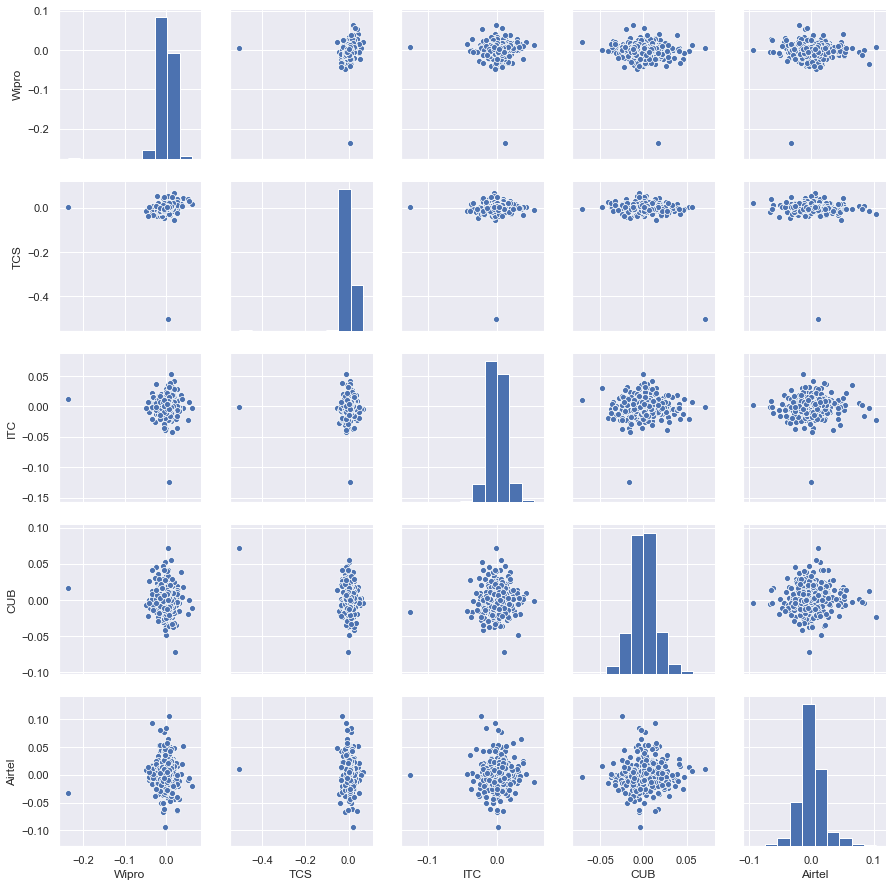

In [59]:
import seaborn as sns
sns.set(color_codes=True)
sns.pairplot(pct_change_dataFrame)

# 2.7

In [60]:
import matplotlib.pyplot as plt
rolling_avg_wipro = pct_change_dataFrame['Wipro'].rolling(7).mean()
rolling_avg_wipro

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
490   -0.002460
491   -0.000773
492   -0.000502
493   -0.000701
494   -0.007166
Name: Wipro, Length: 495, dtype: float64

In [61]:
stand_wipro = rolling_avg_wipro.fillna(0).std()
stand_wipro

0.007472522152842465

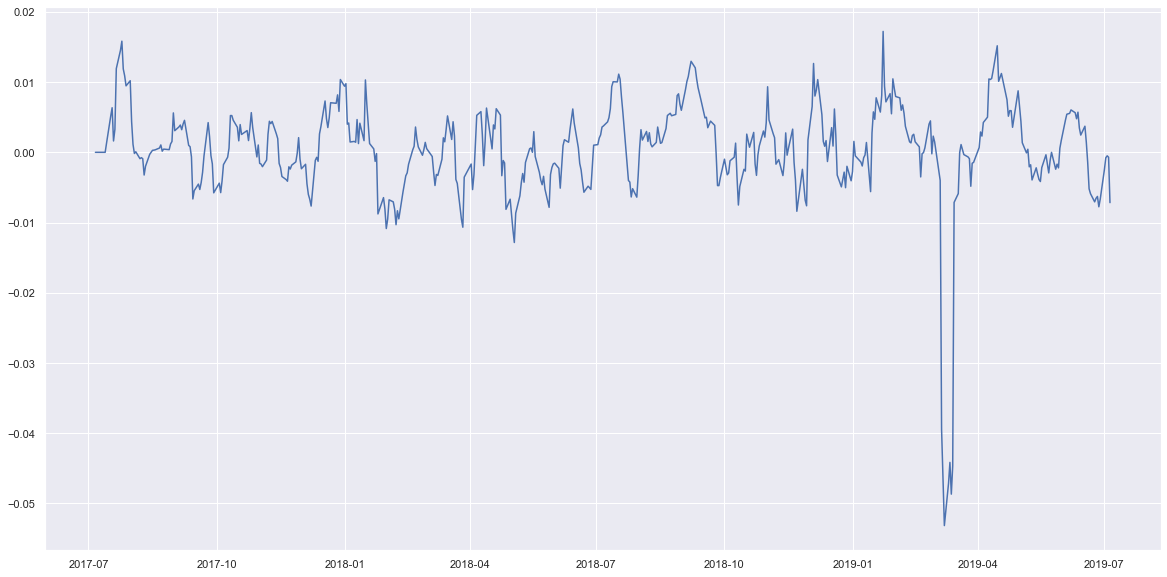

In [62]:
import pandas as pd
crrDate = pd.to_datetime(filter_wipro['Date'])
crrLis = crrDate.tolist()
plt.figure(figsize=(20,10))
plt.plot(crrLis,rolling_avg_wipro.fillna(0).tolist())
plt.show()

# 2.8

In [63]:
nif_load = pd.read_csv('NIFTY50_data.csv')
nif_load

,Date,Open,High,Low,Close
0,05 Jul 2019,11964.75,11981.75,11797.90,11811.15
1,04 Jul 2019,11928.80,11969.25,11923.65,11946.75
2,03 Jul 2019,11932.15,11945.20,11887.05,11916.75
3,02 Jul 2019,11890.30,11917.45,11814.70,11910.30
4,01 Jul 2019,11839.90,11884.65,11830.80,11865.60
...,...,...,...,...,...
490,12 Jul 2017,9807.30,9824.95,9787.70,9816.10
491,11 Jul 2017,9797.45,9830.05,9778.85,9786.05
492,10 Jul 2017,9719.30,9782.15,9646.45,9771.05
493,07 Jul 2017,9670.35,9684.25,9642.65,9665.80


<Figure size 1440x720 with 0 Axes>

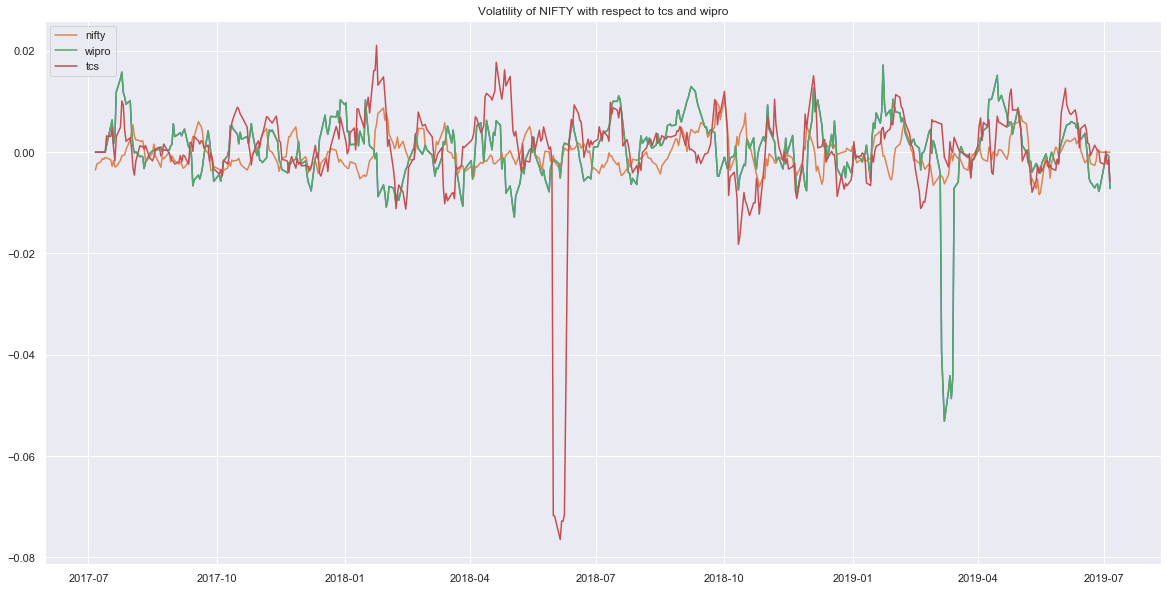

In [65]:
nif_close_price = nif_load['Close']
nif_change = nif_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
nifDate = pd.to_datetime(nif_load['Date'])
nifDate = nifDate.tolist()
plt.figure(figsize=(20,10))

tcs_Date = pd.to_datetime(filter_tcs['Date'])
tcsLis = tcs_Date.tolist()
tcs_close_price = filter_tcs['Close Price']
tcs_change = tcs_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
plt.figure(figsize=(20,10))
plt.plot(tcsLis,rolling_avg_wipro.fillna(0).tolist())

plt.title("Volatility of NIFTY with respect to tcs and wipro")
plt.plot(nifDate,nif_change.tolist(),label = 'nifty')
plt.plot(crrLis,rolling_avg_wipro.fillna(0).tolist(),label = 'wipro')
plt.plot(tcsLis,tcs_change,label = 'tcs')
plt.legend(loc='upper left')
plt.show()

# 2.9

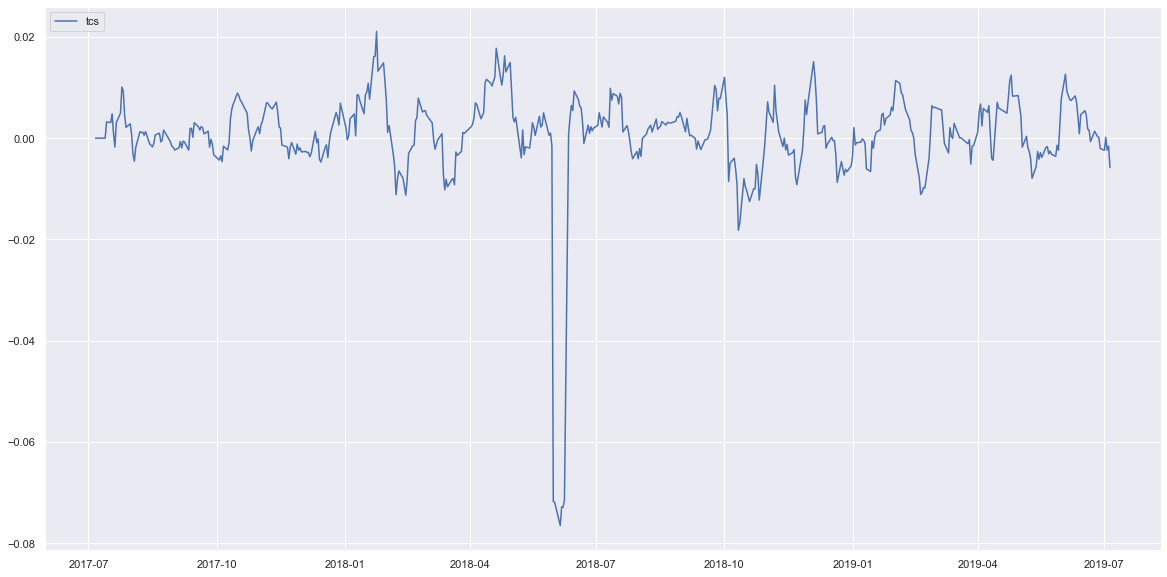

In [66]:
plt.figure(figsize=(20,10))
plt.plot(tcsLis,tcs_change,label = 'tcs')
plt.legend(loc='upper left')
plt.show()

In [68]:
short_window = 21
long_window = 34

signals = pd.DataFrame(index=filter_tcs.index)
signals['signal'] = 0.0

#SMA of Short Window
signals['short_mavg'] = filter_tcs['Close Price'].rolling(window=short_window, min_periods=1,center=False).mean()

#SMA of Long Window
signals['long_mavg'] = filter_tcs['Close Price'].rolling(window=long_window,min_periods=1, center=False).mean()

#Generate trading orders
signals['positions'] = signals['signal'].diff()
print(signals)

     signal   short_mavg    long_mavg  positions
0       0.0  2347.550000  2347.550000        NaN
1       0.0  2339.750000  2339.750000        0.0
2       0.0  2371.483333  2371.483333        0.0
3       0.0  2397.562500  2397.562500        0.0
4       0.0  2405.940000  2405.940000        0.0
..      ...          ...          ...        ...
490     0.0  2239.435714  2183.539706        0.0
491     0.0  2242.080952  2188.238235        0.0
492     0.0  2241.859524  2192.422059        0.0
493     0.0  2244.695238  2196.360294        0.0
494     0.0  2244.552381  2198.350000        0.0

[495 rows x 4 columns]


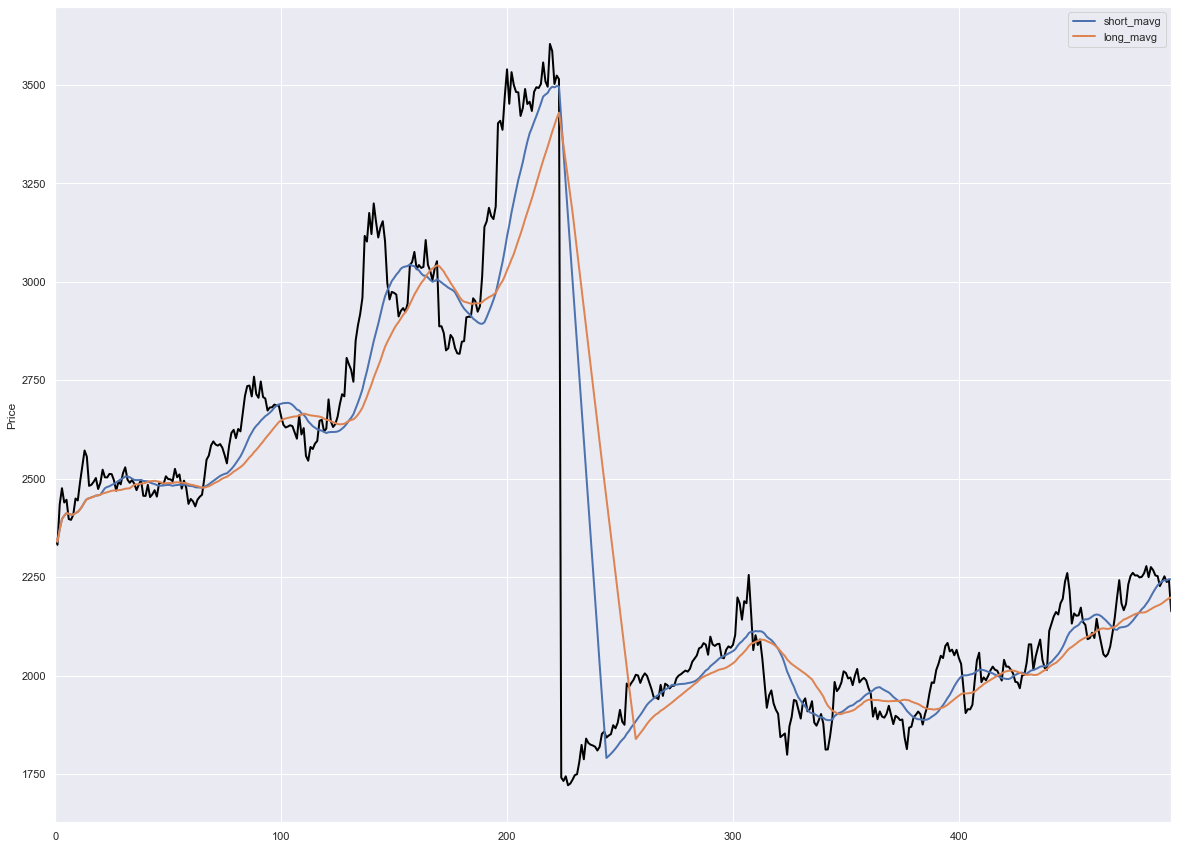

In [69]:
fig = plt.figure(figsize=(20,15))

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price')

#Plot the closing price
filter_tcs['Close Price'].plot(ax=ax1, color='black', lw=2.)

#plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

#Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^' , markersize=20,color='g')

#Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v' , markersize=20,color='r')

plt.show()

# 2.10

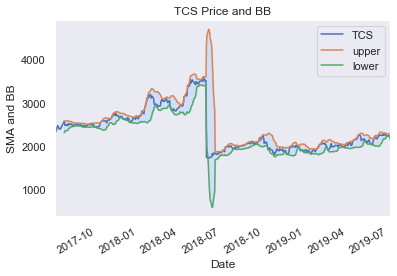

In [70]:
import matplotlib.pyplot as plt

symbol = 'TCS'

# read csv file, use date as index and read close as a column
df = pd.read_csv('tcs_stock_data.csv'.format(symbol), index_col='Date',
                 parse_dates=True, usecols=['Date', 'Close Price'],
                 na_values='nan')

# rename the column header with symbol name
df = df.rename(columns={'Close Price': symbol})
df.dropna(inplace=True)

# calculate Simple Moving Average with 14 days window
sma = df.rolling(window=14).mean()

# calculate the standar deviation
rstd = df.rolling(window=14).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})
df = df.join(upper_band).join(lower_band)
ax = df.plot(title='{} Price and BB'.format(symbol))
ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('Date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()